In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import matplotlib.dates as mdates

In [134]:
pre_data = 'AIR-BJ'
data_file = f'../data/{pre_data}/data_D_in24_out24.pkl'
with open(data_file, "rb") as f:
    pickle_data = pickle.load(f) # (8392, 35, 3)
data = pickle_data['processed_data']
aqi_data = pd.read_csv(f'../data/{pre_data}/aq_station.csv')
aqi_data = aqi_data.sort_values('station_id')
aqi_data

,station_id,longitude,latitude,mapped_id
4,aotizhongxin_aq,116.397,39.982,0
24,badaling_aq,115.988,40.365,1
7,beibuxinqu_aq,116.174,40.090,2
13,daxing_aq,116.404,39.718,3
23,dingling_aq,116.220,40.292,4
26,donggaocun_aq,117.120,40.100,5
0,dongsi_aq,116.417,39.929,6
34,dongsihuan_aq,116.483,39.939,7
12,fangshan_aq,116.136,39.742,8
9,fengtaihuayuan_aq,116.279,39.863,9


In [135]:
class StandardScaler():
    """
    Standard scaler for input normalization
    """

    def __init__(self, data=None, mean=0.0, std=1.0):
        if data is not None:
            self.mean = np.mean(data)
            self.std = np.std(data)
        else:
            self.mean = mean
            self.std = std

    def transform(self, data):
        return (data - self.mean) / self.std

    def inverse_transform(self, data):
        return (data * self.std) + self.mean

scaler = StandardScaler(mean=pickle_data['scaler'][0], std=pickle_data['scaler'][1])

air = scaler.inverse_transform(data[..., 0])

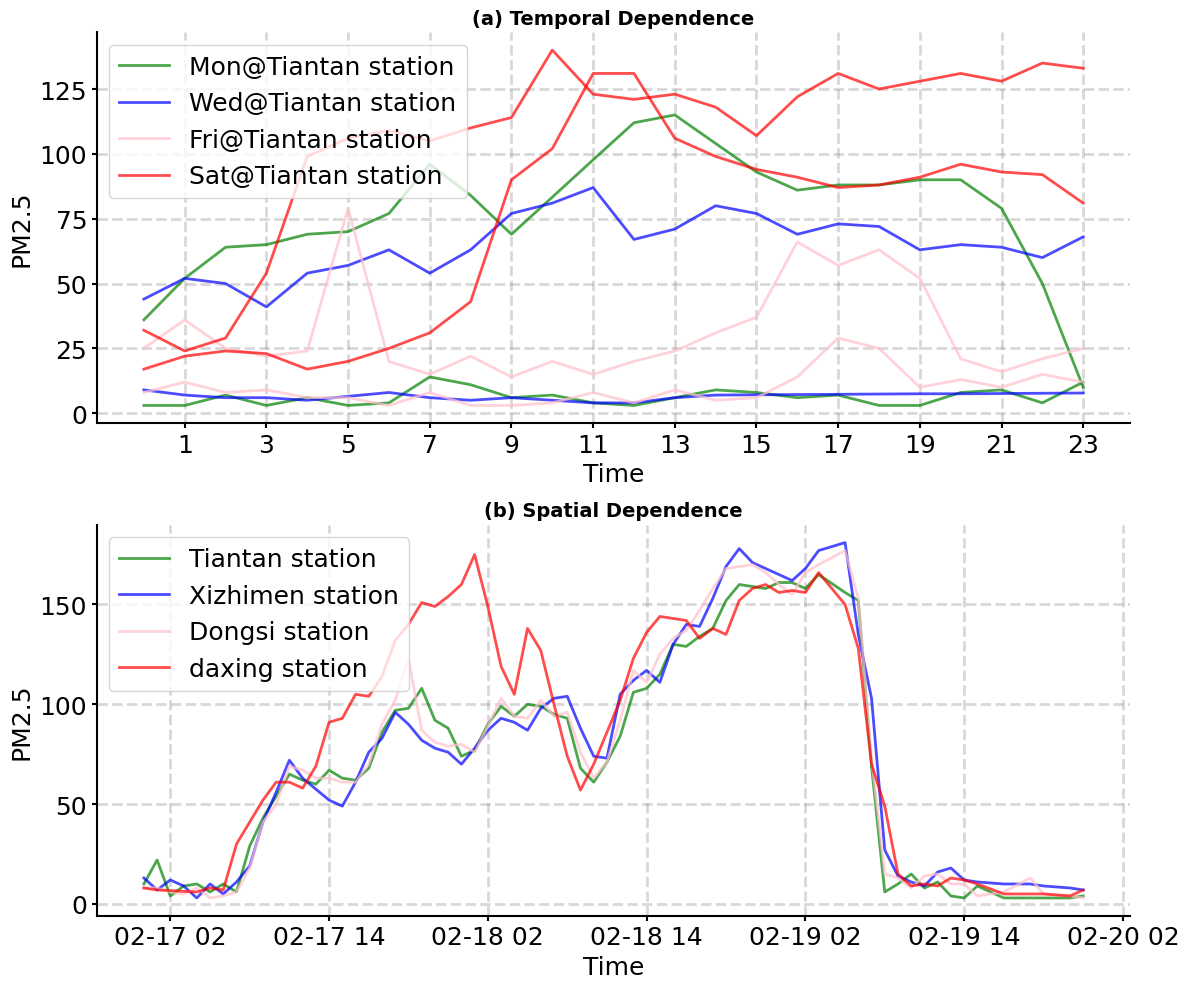

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

periods = 24
stations = 12
basep = 24*7*10
basep2 = 24*7*1
air_t1 = air[basep:basep+periods,stations]
air_t11 = air[basep2:basep2+periods,stations]
air_t2 = air[basep+periods*2:basep+periods*3,stations]
air_t22 = air[basep2+periods*1:basep2+periods*2,stations]
air_t3 = air[basep+periods*4:basep+periods*5,stations]
air_t33 = air[basep2+periods*3:basep2+periods*4,stations]
air_t4 = air[basep+periods*5:basep+periods*6,stations]
air_t44 = air[basep2+periods*5:basep2+periods*6,stations]
times1 = np.arange(0, 24)

axes[0].plot(times1, air_t1, label='Mon@Tiantan station', color='green', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t11, color='green', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t2, label='Wed@Tiantan station', color='blue', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t22, color='blue', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t3, label='Fri@Tiantan station', color='pink', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t33, color='pink', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t4, label='Sat@Tiantan station', color='red', alpha=0.7, linewidth=2.0)
axes[0].plot(times1, air_t44, color='red', alpha=0.7, linewidth=2.0)

axes[0].set_title('(a) Temporal Dependence', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=18)
axes[0].set_ylabel('PM2.5', fontsize=18)
axes[0].legend(fontsize=18)
axes[0].grid(True)
axes[0].set_xticks(np.arange(1, 25, 2))  # 每小时一个刻度

bases = 24*17
times2 = pd.date_range('2017-02-17', periods=periods*3, freq='H')

air_s1 = air[bases:bases+periods*3,23]
air_s2 = air[bases:bases+periods*3,27]
air_s3 = air[bases:bases+periods*3,6]
air_s4 = air[bases:bases+periods*3,3]

axes[1].plot(times2, air_s1, label='Tiantan station', color='green', alpha=0.7, linewidth=2.0)
axes[1].plot(times2, air_s2, label='Xizhimen station', color='blue', alpha=0.7, linewidth=2.0)
axes[1].plot(times2, air_s3, label='Dongsi station', color='pink', alpha=0.7, linewidth=2.0)
axes[1].plot(times2, air_s4, label='daxing station', color='red', alpha=0.7, linewidth=2.0)

axes[1].set_title('(b) Spatial Dependence', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=18)
axes[1].set_ylabel('PM2.5', fontsize=18)
axes[1].legend(fontsize=18)
axes[1].grid(True)
axes[1].xaxis.set_major_locator(mdates.HourLocator(interval=12))

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.yaxis.set_tick_params(width=1.5)
    ax.xaxis.set_tick_params(width=1.5)
    ax.grid(color='gray', linestyle='--', alpha=0.3, linewidth=2)

plt.tight_layout()
plt.savefig('intro_st.pdf')
plt.show()